In [1]:
import pandas as pd
import numpy as np
import seaborn
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv('data/train.tsv', sep='\t')
df_train.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [4]:
df_test = pd.read_csv('data/test.tsv', sep='\t')
df_test.head()

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine


In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66292 entries, 0 to 66291
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   PhraseId    66292 non-null  int64 
 1   SentenceId  66292 non-null  int64 
 2   Phrase      66292 non-null  object
dtypes: int64(2), object(1)
memory usage: 1.5+ MB


In [6]:
neg_train_df = df_train[df_train.Sentiment <2]
neg_train_df.shape

(34345, 4)

In [7]:
pos_train_df = df_train[df_train.Sentiment >2]
pos_train_df.shape

(42133, 4)

In [8]:
neg_review = neg_train_df.Phrase
neg_review.head()

0     A series of escapades demonstrating the adage ...
33    the gander , some of which occasionally amuses...
47         but none of which amounts to much of a story
49             none of which amounts to much of a story
81    Even fans of Ismail Merchant 's work , I suspe...
Name: Phrase, dtype: object

In [9]:
pos_review = pos_train_df.Phrase
pos_review.head()

21                                   good for the goose
22                                                 good
46                                               amuses
63    This quiet , introspective and entertaining in...
64    This quiet , introspective and entertaining in...
Name: Phrase, dtype: object

In [10]:
from wordcloud import WordCloud, STOPWORDS

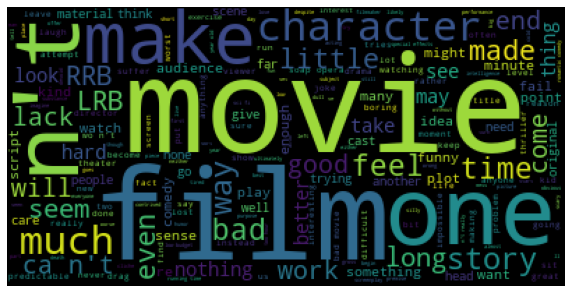

In [11]:
wordcloud_neg = WordCloud(stopwords = STOPWORDS).generate(' '.join(neg_review))
# Generate plot
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud_neg)
plt.axis("off")
plt.show()

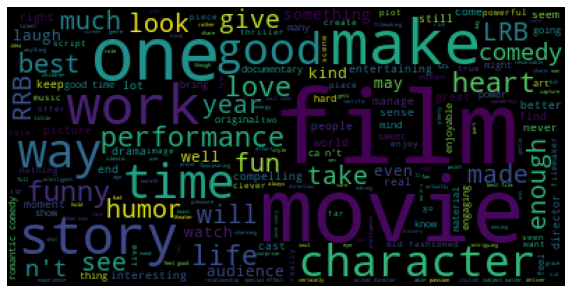

In [12]:
wordcloud_pos = WordCloud(stopwords = STOPWORDS).generate(' '.join(pos_review))
# Generate plot
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud_pos)
plt.axis("off")
plt.show()

In [15]:
top_20_pos = list(wordcloud_pos.words_.items())[:20]
top_20_pos

[('film', 1.0),
 ('movie', 0.7417133017649591),
 ('one', 0.47008179078777446),
 ('make', 0.3362031855359449),
 ('work', 0.2544123977615153),
 ('story', 0.22901420576840292),
 ('time', 0.17993973310374517),
 ('way', 0.17606543263021954),
 ('character', 0.16401205337925095),
 ('good', 0.16142918639690057),
 ('performance', 0.15626345243219975),
 ('love', 0.15626345243219975),
 ('life', 0.15540249677141627),
 ('heart', 0.15066724063710718),
 ('funny', 0.14636246233318984),
 ('best', 0.13861386138613863),
 ('LRB', 0.13043478260869565),
 ('much', 0.12656048213517004),
 ('will', 0.12397761515281963),
 ('fun', 0.11967283684890229)]

In [16]:
top_20_neg = list(wordcloud_neg.words_.items())[:20]
top_20_neg

[('movie', 1.0),
 ('film', 0.8802533103051238),
 ('one', 0.4651698330454807),
 ("n't", 0.43753598157743234),
 ('make', 0.30397236614853196),
 ('character', 0.29015544041450775),
 ('much', 0.25676453655728265),
 ('story', 0.24755325273459988),
 ('way', 0.2452504317789292),
 ('bad', 0.21991940126655152),
 ('feel', 0.2118595279217041),
 ('time', 0.20552677029360966),
 ('even', 0.18595279217040875),
 ('made', 0.18134715025906736),
 ('little', 0.17501439263097293),
 ('seem', 0.1560161197466897),
 ('RRB', 0.15083477259643063),
 ('LRB', 0.1473805411629246),
 ('long', 0.14507772020725387),
 ('end', 0.1358664363845711)]